In [ ]:
from ultralytics import YOLO

model = YOLO('yolo11n.pt')

In [ ]:
colors = [
    (255, 0, 0),
    (255, 255, 0),
    (0, 255, 0),
    (0, 255, 255),
    (0, 0, 255),
    (0, 0, 0),
]

def detect(image):
    results = model(image)
    if not results:
        return
    
    result = results[0]
    for box in result.boxes:
        x1, y1, x2, y2 = box.xyxy[0]
        name = result.names[int(box.cls[0])]
        conf = box.conf[0]
        
        x1 = int(x1)
        y1 = int(y1)
        x2 = int(x2)
        y2 = int(y2)
    
        color = colors[random.randint(0, len(colors) - 1)]
    
        image = cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)
        image = cv2.putText(image, f'{name} {conf:.2f}', (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2, cv2.LINE_AA)
    return image

In [5]:
del cam

In [ ]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import time

cam = cv2.VideoCapture(0)

while True:
    ret, image = cam.read()
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    image = detect(image)
    #Show the image with matplotlib
    plt.imshow(image)
    plt.show()
    
    time.sleep(0.1)
cam.release()

Using cache found in /home/pi/.cache/torch/hub/intel-isl_MiDaS_master
Using cache found in /home/pi/.cache/torch/hub/intel-isl_MiDaS_master


Loading weights:  None


Using cache found in /home/pi/.cache/torch/hub/rwightman_gen-efficientnet-pytorch_master


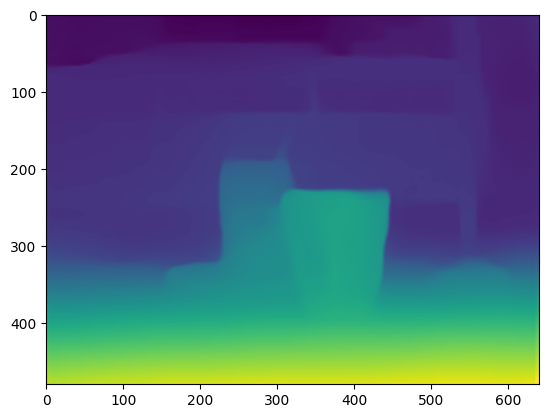

In [9]:
#https://pytorch.org/hub/intelisl_midas_v2/

%matplotlib inline
import torch
import cv2
from matplotlib import pyplot as plt
import time

cam = cv2.VideoCapture(0)
_, img = cam.read()
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

midas_transforms = torch.hub.load("intel-isl/MiDaS", "transforms")
transform = midas_transforms.small_transform

midas = torch.hub.load('intel-isl/MiDaS', 'MiDaS_small')
midas.eval()

input_batch = transform(img)

with torch.no_grad():
    prediction = midas(input_batch)

    prediction = torch.nn.functional.interpolate(
        prediction.unsqueeze(1),
        size=img.shape[:2],
        mode="bicubic",
        align_corners=False,
    ).squeeze()

output = prediction.cpu().numpy()
plt.imshow(output)
plt.show()

del cam

In [7]:
output

array([[ 74.727806,  73.51972 ,  70.81975 , ..., 310.85303 , 287.25616 ,
        276.0115  ],
       [ 73.9465  ,  72.97288 ,  70.81984 , ..., 318.18283 , 297.65915 ,
        287.9484  ],
       [ 72.19701 ,  71.76802 ,  70.88756 , ..., 333.8468  , 319.80682 ,
        313.33084 ],
       ...,
       [854.1863  , 853.8634  , 854.14453 , ..., 828.0204  , 823.0483  ,
        821.78723 ],
       [848.61127 , 848.2897  , 848.17053 , ..., 826.2066  , 819.6023  ,
        817.6555  ],
       [846.4031  , 846.15173 , 846.02356 , ..., 825.71216 , 818.21173 ,
        815.8824  ]], dtype=float32)